# Assignment-I

## Univariate Linear Regression
year vs min price and year vs max price


In [ ]:
#library imports
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

In [ ]:
# getting the data from the csv file
def get_data(label):
  df = pd.read_csv("ford_ranger.csv")
  X = torch.from_numpy(df["year"].to_numpy()).unsqueeze(1).float()
  Y = torch.from_numpy(df[label].to_numpy()).unsqueeze(1).float()
  return X,Y


### Lets try to visualize the data

In [ ]:
X,Y_min = get_data('min_price')
X,Y_max = get_data('max_price')

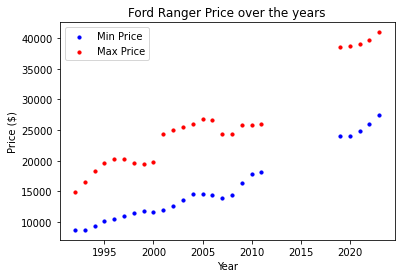

In [ ]:
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y_min.detach().numpy(),c='b',s=10, label='Min Price')
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y_max.detach().numpy(),c='r',s=10, label='Max Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Ford Ranger Price over the years')
plt.show()

## Using Following functions from Professor's Notebook as reference

In [ ]:
# forward pass
def linreg(X, theta_1, theta_0):
  """The linear regression model."""
  y_pred = torch.matmul(X, theta_1) + theta_0
  return y_pred

In [ ]:
# Computing the MSE
def MSE_loss(y_out, y_true):
  """Squared loss."""
  return (y_out - y_true.reshape(y_out.shape))**2 / 2

In [ ]:
# defining the learning algorithm
def sgd(params, lr,batch_size):
  """stochastic gradient descent."""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad/batch_size
      param.grad.zero_()

## TASK 1: Min Price Prediction without scaling
we need theta_0 and theta_1

F(x) = theta_0 + theta_1*x

In [ ]:
# Initialing our parameters
Theta_1 = torch.normal(0, 0.01, size=(1, 1), requires_grad=True)
Theta_0 = torch.zeros(1, requires_grad=True)

In [ ]:
print("Initial Theta Values")
print(Theta_0, Theta_1)

Initial Theta Values
tensor([0.], requires_grad=True) tensor([[-0.0020]], requires_grad=True)


In [ ]:
# hyper_paramters for training
lr = 0.00000005
num_epochs = 100
net = linreg
loss = MSE_loss
batch_size = X.shape[0]

In [ ]:
# Training the model
X,Y = get_data('min_price')
loss1 = []
for epoch in range(num_epochs):
    l = loss(net(X, Theta_1, Theta_0), Y)
    l.sum().backward()
    sgd([Theta_1, Theta_0], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
      train_l = loss(net(X, Theta_1, Theta_0), Y)
      loss1.append(float(train_l.mean()))
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 90114960.000000
epoch 2, loss 62960756.000000
epoch 3, loss 45629224.000000
epoch 4, loss 34567132.000000
epoch 5, loss 27506598.000000
epoch 6, loss 23000120.000000
epoch 7, loss 20123798.000000
epoch 8, loss 18287948.000000
epoch 9, loss 17116190.000000
epoch 10, loss 16368297.000000
epoch 11, loss 15890947.000000
epoch 12, loss 15586271.000000
epoch 13, loss 15391807.000000
epoch 14, loss 15267689.000000
epoch 15, loss 15188466.000000
epoch 16, loss 15137903.000000
epoch 17, loss 15105629.000000
epoch 18, loss 15085033.000000
epoch 19, loss 15071884.000000
epoch 20, loss 15063493.000000
epoch 21, loss 15058136.000000
epoch 22, loss 15054717.000000
epoch 23, loss 15052536.000000
epoch 24, loss 15051144.000000
epoch 25, loss 15050254.000000
epoch 26, loss 15049687.000000
epoch 27, loss 15049326.000000
epoch 28, loss 15049094.000000
epoch 29, loss 15048946.000000
epoch 30, loss 15048852.000000
epoch 31, loss 15048792.000000
epoch 32, loss 15048754.000000
epoch 33, loss 15

### TASK 1: Final Weights for min price without scaling

In [ ]:
print(Theta_1,Theta_0)

tensor([[7.6457]], requires_grad=True) tensor([0.0037], requires_grad=True)


In [ ]:
y_pred = net(X, Theta_1, Theta_0)

### TASK 1: Plotting predictions

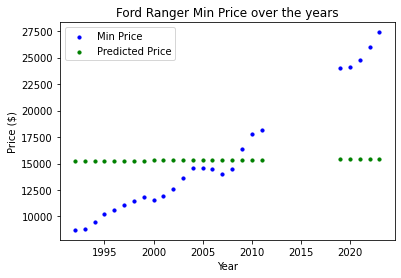

In [ ]:
# without the missing years
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Min Price')
plt.scatter(x=X[:, (0)].detach().numpy(),y=y_pred.T.detach().numpy(),c='g',s=10, label='Predicted Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Ford Ranger Min Price over the years')
plt.show()

In [ ]:
# Predicting for missing years
missing_year = list(range(2012, 2019))
X_val = torch.Tensor(missing_year).unsqueeze(dim=1)

In [ ]:
Y_val = net(X_val, Theta_1, Theta_0)

<ipython-input-17-86830b526a58>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.plot(X[:, (0)].detach().numpy(),y_pred[:,0].T.detach().numpy(),c='g', label='Predicted Price')


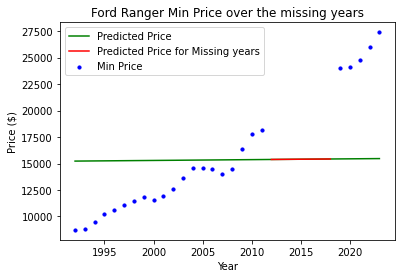

In [ ]:
# Plotting along with missing years
plt.plot(X[:, (0)].detach().numpy(),y_pred[:,0].T.detach().numpy(),c='g', label='Predicted Price')
plt.plot(X_val[:, (0)].detach().numpy(),Y_val[:,0].T.detach().numpy(),c='r', label='Predicted Price for Missing years')
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Min Price')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Ford Ranger Min Price over the missing years')
plt.show()

## MAX Price Prediction without scaling

In [ ]:
print("Generating Random Theta for Max Price without scaling\n")
#Theta_1 = torch.randint(5,10,size=(1,1),requires_grad=True,dtype=torch.float32)
Theta_1 = torch.normal(0, 0.01, size=(1, 1), requires_grad=True)
Theta_0 = torch.zeros(1, requires_grad=True)
print(Theta_1, Theta_0)

Generating Random Theta for Max Price without scaling

tensor([[0.0148]], requires_grad=True) tensor([0.], requires_grad=True)


In [ ]:
X,Y = get_data('max_price')

In [ ]:
# hyper_paramters
lr = 0.00000005
num_epochs = 100
net = linreg
loss = MSE_loss
batch_size = X.shape[0]

In [ ]:
print('Training our model for max price')
loss2=[]
for epoch in range(num_epochs):
    l = loss(net(X, Theta_1, Theta_0), Y)
    l.sum().backward()
    sgd([Theta_1, Theta_0], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
      train_l = loss(net(X, Theta_1, Theta_0), Y)
      loss2.append(float(train_l.mean()))
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

Training our model for max price
epoch 1, loss 240815104.000000
epoch 2, loss 163595712.000000
epoch 3, loss 114309336.000000
epoch 4, loss 82851632.000000
epoch 5, loss 62773340.000000
epoch 6, loss 49958096.000000
epoch 7, loss 41778564.000000
epoch 8, loss 36557884.000000
epoch 9, loss 33225708.000000
epoch 10, loss 31098906.000000
epoch 11, loss 29741446.000000
epoch 12, loss 28875026.000000
epoch 13, loss 28322028.000000
epoch 14, loss 27969062.000000
epoch 15, loss 27743778.000000
epoch 16, loss 27599988.000000
epoch 17, loss 27508212.000000
epoch 18, loss 27449636.000000
epoch 19, loss 27412244.000000
epoch 20, loss 27388386.000000
epoch 21, loss 27373150.000000
epoch 22, loss 27363430.000000
epoch 23, loss 27357224.000000
epoch 24, loss 27353262.000000
epoch 25, loss 27350738.000000
epoch 26, loss 27349126.000000
epoch 27, loss 27348094.000000
epoch 28, loss 27347438.000000
epoch 29, loss 27347018.000000
epoch 30, loss 27346750.000000
epoch 31, loss 27346580.000000
epoch 32, lo

In [ ]:
print("Final Theta for Max Price without scaling\n")
print(Theta_1,Theta_0)

Final Theta for Max Price without scaling

tensor([[12.9115]], requires_grad=True) tensor([0.0063], requires_grad=True)


In [ ]:
# Predicting Train Data
Y_pred = net(X, Theta_1, Theta_0)

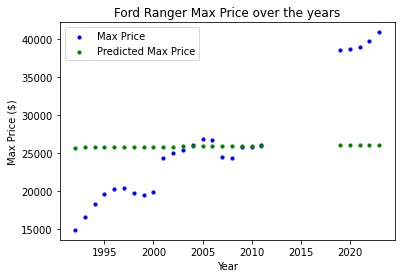

In [ ]:
# Plotting over the years without missing data
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Max Price')
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y_pred.T.detach().numpy(),c='g',s=10, label='Predicted Max Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Max Price ($)')
plt.title('Ford Ranger Max Price over the years')
plt.show()

In [ ]:
# Predicting for missing years
missing_year = list(range(2012, 2019))
X_val = torch.Tensor(missing_year).unsqueeze(dim=1)

In [ ]:
Y_val = net(X_val, Theta_1, Theta_0)

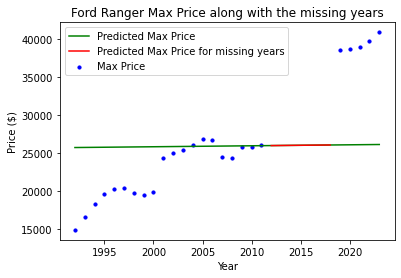

In [ ]:
# Predicting with the missing years
plt.plot(X.detach().numpy(),Y_pred.detach().numpy(),c='g', label='Predicted Max Price')
plt.plot(X_val.detach().numpy(),Y_val.detach().numpy(),c='r', label='Predicted Max Price for missing years')
plt.scatter(x=X[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Max Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Ford Ranger Max Price along with the missing years')
plt.show()

## Loss over 100 iterations for both predictions without scaling

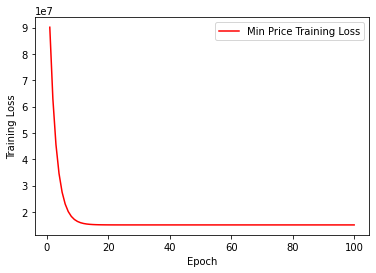

In [ ]:
# Min Price Training Loss
plt.plot(list(range(1,101)), loss1, c='r', label='Min Price Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

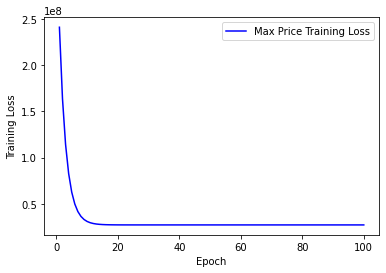

In [ ]:
# Max Price Training Loss
plt.plot(list(range(1,101)), loss2, c='b', label='Max Price Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

## TASK 2: Linear Regression using feature scaling and dynamic learning rate

## Predicting for Min Price

In [ ]:
# get data
X_orig,Y_orig = get_data('min_price')

In [ ]:
# scaling parameters
u = torch.mean(X_orig)
s = torch.std(X_orig)

In [ ]:
# scaling function
def scale_x(X,mean,std):
  return torch.sub(X, u)/s

In [ ]:
# scaling X with normalisation and Y with 1000
X = scale_x(X_orig,u,s)
Y = Y_orig/1000

In [ ]:
print("Generating Random Theta for Min Price\n")
Theta_1 = torch.normal(0, 0.01, size=(1, 1), requires_grad=True)
Theta_0 = torch.zeros(1, requires_grad=True)
print("Initial Thetas: ",Theta_1, Theta_0)

Generating Random Theta for Min Price

Initial Thetas:  tensor([[-0.0037]], requires_grad=True) tensor([0.], requires_grad=True)


In [ ]:
# hyper_paramters
lr = 0.1
c = 1000
num_epochs = 100
net = linreg
loss = MSE_loss
batch_size = X.shape[0]

In [ ]:
# Training with feature scaling and dynamic learning rate
loss1=[]
for epoch in range(num_epochs):
    l = loss(net(X, Theta_1, Theta_0), Y)
    l.sum().backward()
    lr = lr*(c/(c+epoch))
    sgd([Theta_1, Theta_0], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
      train_l = loss(net(X, Theta_1, Theta_0), Y)
      loss1.append(float(train_l.mean()))
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 107.624069
epoch 2, loss 87.378601
epoch 3, loss 70.991112
epoch 4, loss 57.732998
epoch 5, loss 47.009666
epoch 6, loss 38.337040
epoch 7, loss 31.321888
epoch 8, loss 25.645403
epoch 9, loss 21.049551
epoch 10, loss 17.325762
epoch 11, loss 14.305686
epoch 12, loss 11.853537
epoch 13, loss 9.859876
epoch 14, loss 8.236556
epoch 15, loss 6.912587
epoch 16, loss 5.830804
epoch 17, loss 4.945168
epoch 18, loss 4.218587
epoch 19, loss 3.621164
epoch 20, loss 3.128779
epoch 21, loss 2.721968
epoch 22, loss 2.384990
epoch 23, loss 2.105119
epoch 24, loss 1.872036
epoch 25, loss 1.677373
epoch 26, loss 1.514330
epoch 27, loss 1.377370
epoch 28, loss 1.261977
epoch 29, loss 1.164462
epoch 30, loss 1.081807
epoch 31, loss 1.011531
epoch 32, loss 0.951600
epoch 33, loss 0.900332
epoch 34, loss 0.856342
epoch 35, loss 0.818482
epoch 36, loss 0.785800
epoch 37, loss 0.757503
epoch 38, loss 0.732931
epoch 39, loss 0.711532
epoch 40, loss 0.692842
epoch 41, loss 0.676473
epoch 42, lo

In [ ]:
print("Final Theta for Min Price with Scaling\n")

print(Theta_1,Theta_0)

Final Theta for Min Price with Scaling

tensor([[5.4721]], requires_grad=True) tensor([15.0635], requires_grad=True)


In [ ]:
# Predicting Train Data
Y_pred = net(X, Theta_1, Theta_0)

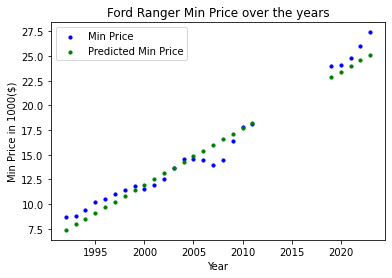

In [ ]:
# Plotting without the missing years
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Min Price')
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y_pred.T.detach().numpy(),c='g',s=10, label='Predicted Min Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Min Price in 1000($)')
plt.title('Ford Ranger Min Price over the years')
plt.show()

In [ ]:
# Predicting for missing years
missing_year = list(range(2012, 2019))
X_val_orig =torch.Tensor(missing_year).unsqueeze(dim=1)
X_val = scale_x(X_val_orig,u,s)
Y_val = net(X_val, Theta_1, Theta_0)

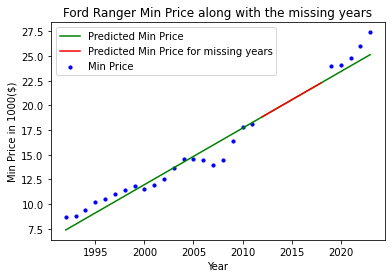

In [ ]:
# Predicting with the missing years
plt.plot(X_orig[:, (0)].detach().numpy(),Y_pred.detach().numpy(),c='g', label='Predicted Min Price')
plt.plot(X_val_orig[:,0].detach().numpy(),Y_val.detach().numpy(),c='r', label='Predicted Min Price for missing years')
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Min Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Min Price in 1000($)')
plt.title('Ford Ranger Min Price along with the missing years')
plt.show()

In [ ]:
# Predicting Min Price for 2024 using the better model
missing_year = list(range(2024, 2025))
X_val_orig =torch.Tensor(missing_year).unsqueeze(dim=1)
X_val = scale_x(X_val_orig,u,s)
Y_val= net(X_val, Theta_1, Theta_0)
print("Min Price Predicted for 2024 is ", Y_val[0,0].detach().numpy()*1000,"$")

Min Price Predicted for 2024 is  25703.882217407227 $


## Predicting Max Price

In [ ]:
X_orig,Y_orig = get_data('max_price')

In [ ]:
# scaling parameters
u = torch.mean(X_orig)
s = torch.std(X_orig)

In [ ]:
X = scale_x(X_orig,u,s)
Y = Y_orig/1000

In [ ]:
print("Generating Random Theta for Max Price\n")
Theta_1 = torch.normal(0, 0.01, size=(1, 1), requires_grad=True)
Theta_0 = torch.zeros(1, requires_grad=True)
print("Initial Values: ", Theta_1, Theta_0)

Generating Random Theta for Max Price

Initial Values:  tensor([[-0.0047]], requires_grad=True) tensor([0.], requires_grad=True)


In [ ]:
# hyper_paramters
lr = 0.1
c = 2000
num_epochs = 100
net = linreg
loss = MSE_loss
batch_size = X.shape[0]

In [ ]:
# Training our model for Max Price
loss2=[]
for epoch in range(num_epochs):
    l = loss(net(X, Theta_1, Theta_0), Y)
    l.sum().backward()
    lr = lr*(c/(c+epoch))
    sgd([Theta_1, Theta_0], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
      train_l = loss(net(X, Theta_1, Theta_0), Y)
      loss2.append(float(train_l.mean()))
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 294.263977
epoch 2, loss 238.901169
epoch 3, loss 194.066422
epoch 4, loss 157.766647
epoch 5, loss 128.381088
epoch 6, loss 104.593414
epoch 7, loss 85.335686
epoch 8, loss 69.742287
epoch 9, loss 57.112255
epoch 10, loss 46.878326
epoch 11, loss 38.581745
epoch 12, loss 31.851679
epoch 13, loss 26.388487
epoch 14, loss 21.950123
epoch 15, loss 18.341101
epoch 16, loss 15.403535
epoch 17, loss 13.009895
epoch 18, loss 11.057185
epoch 19, loss 9.462167
epoch 20, loss 8.157570
epoch 21, loss 7.088997
epoch 22, loss 6.212427
epoch 23, loss 5.492231
epoch 24, loss 4.899538
epoch 25, loss 4.410933
epoch 26, loss 4.007422
epoch 27, loss 3.673570
epoch 28, loss 3.396826
epoch 29, loss 3.166970
epoch 30, loss 2.975680
epoch 31, loss 2.816154
epoch 32, loss 2.682837
epoch 33, loss 2.571188
epoch 34, loss 2.477477
epoch 35, loss 2.398652
epoch 36, loss 2.332196
epoch 37, loss 2.276042
epoch 38, loss 2.228485
epoch 39, loss 2.188115
epoch 40, loss 2.153765
epoch 41, loss 2.124470
e

In [ ]:
print("Final Theta for Max Price scaling\n")

print(Theta_1,Theta_0)

Final Theta for Max Price scaling

tensor([[7.3693]], requires_grad=True) tensor([25.7726], requires_grad=True)


In [ ]:
# Predicting Train Data
Y_pred = net(X, Theta_1, Theta_0)

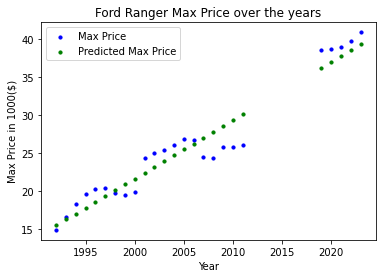

In [ ]:
# Plotting without the missing year
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Max Price')
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y_pred.T.detach().numpy(),c='g',s=10, label='Predicted Max Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Max Price in 1000($)')
plt.title('Ford Ranger Max Price over the years')
plt.show()

In [ ]:
# Predicting for missing years
missing_year = list(range(2012, 2019))
X_val_orig =torch.Tensor(missing_year).unsqueeze(dim=1)
X_val = scale_x(X_val_orig,u,s)
Y_val = net(X_val, Theta_1, Theta_0)

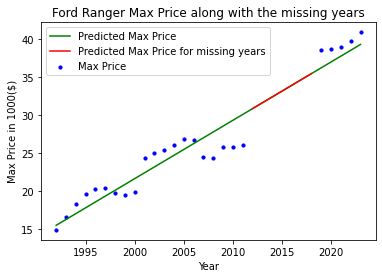

In [ ]:
# Predicting with the missing years
plt.plot(X_orig[:, (0)].detach().numpy(),Y_pred.detach().numpy(),c='g', label='Predicted Max Price')
plt.plot(X_val_orig[:,0].detach().numpy(),Y_val.detach().numpy(),c='r', label='Predicted Max Price for missing years')
plt.scatter(x=X_orig[:, (0)].detach().numpy(),y=Y.detach().numpy(),c='b',s=10, label='Max Price')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Max Price in 1000($)')
plt.title('Ford Ranger Max Price along with the missing years')
plt.show()

### Training Loss Curve After Scaling and Dynamic Learning Rate

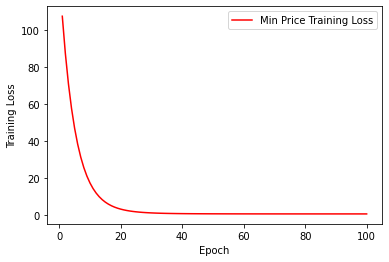

In [ ]:
# Training loss curve for min price
plt.plot(list(range(1,101)), loss1, c='r', label='Min Price Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

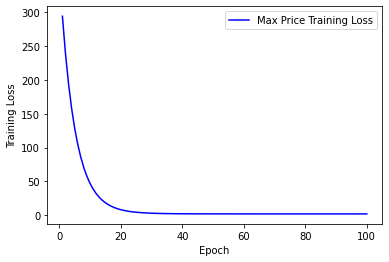

In [ ]:
# Training loss curve for max price
plt.plot(list(range(1,101)), loss2, c='b', label='Max Price Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [ ]:
# Predicting Max Price for 2024 using the better model
missing_year = list(range(2024, 2025))
X_val_orig =torch.Tensor(missing_year).unsqueeze(dim=1)
X_val = scale_x(X_val_orig,u,s)
Y_val = net(X_val, Theta_1, Theta_0)
print("Max Price Predicted for 2024 is ", Y_val[0,0].detach().numpy()*1000,"$")

Max Price Predicted for 2024 is  40102.09655761719 $


## Question 5:
1. What is the price range of next generation Ranger predicted by your program (For 2024)?
- The price range for Ford Ranger 2024 is `$25703.54 to $40102.18`.

2. What are final values of Theta after training?
- For Min Price the theta are:
`tensor([[5.4720]], requires_grad=True) tensor([15.0635], requires_grad=True)`

- For Max Price the theta are:
`tensor([[7.3694]], requires_grad=True) tensor([25.7726], requires_grad=True)`


3. What is your thought on your model?
- I think that simple linear regression model with scaling is performing good.

4. How can you improve it? Comparison of performance?
- It can be improved by taking into consideration other features as well economic inflation rate increment each year.

5. Will you buy a next generation Ranger at that price?
- No, I would buy different car at this budget.